# Very first modis tests, 4 September 2019

Key is to learn how to import data, mask clouds, and then apply distribution analysis.

Starts off with a prepared file from Roel, will have to move to downloading and processing the data yourself after this. 

## Things to do. 
* Get familiar with how to load netcdf files (nc) and how ndi.label and ndi.label_comprehensive work
* Install panoply (recommended)
* Understand difference between plt.imshow and plt.pcolor.  
* Understand how %%time works. 
* Go through code below, add comments what is happening. 
* Make power law plots of cloud size distribution, calculate slope
* change the ref_min value, see how it changes results
* Use sur_refl_b02_1 instead of sur_refl_b01_1, see how it changes results
* Plot results from sur_refl_b01_1 and sur_refl_b02_1 in the same plots. 


In [2]:
from netCDF4 import Dataset
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import matplotlib
from random import random
import numpy as np
from slopes_and_binning import *


In [3]:
from importlib import reload
import slopes_and_binning
reload(slopes_and_binning)
from slopes_and_binning import *

number of clouds 15304
max and min cloud area 1.0 622.0048231324256
n: 3855
-2.4408763690571833 -2.463371812052228 -1.4617249213495151


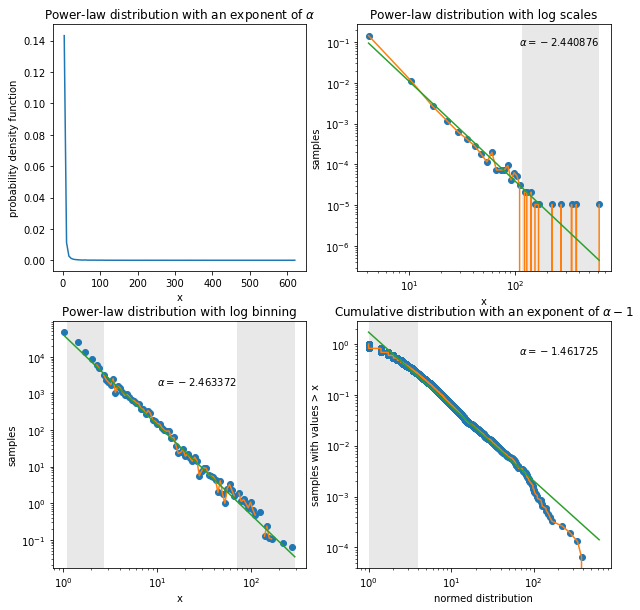

In [4]:
file_modis = Dataset('./MOD09GQ.A2013348.h12v07.006.2015271092141.nc')
file_modis.variables.keys()
fig,m1,m2,m3 = cloud_size_dist('sur_refl_b02_1',100,4e7,1,300,file_modis,x_min_pl=4)
print(m1,m2,m3)

number of clouds 32097
max and min cloud area 1.0 1738.8122382822132
n: 7871
number of clouds 24356
max and min cloud area 1.0 1276.371811033133
n: 5925
number of clouds 18554
max and min cloud area 1.0 1069.8298930203812
n: 4609
number of clouds 15304
max and min cloud area 1.0 622.0048231324256
n: 3855
number of clouds 11676
max and min cloud area 1.0 261.9809153354496
n: 3242
number of clouds 9322
max and min cloud area 1.0 152.58112596255148
n: 2677


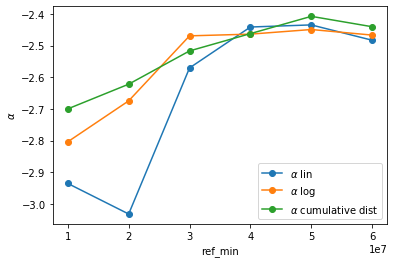

In [64]:
file_modis = Dataset('./MOD09GQ.A2013348.h12v07.006.2015271092141.nc')
file_modis.variables.keys()
ref_min = [1e7,2e7,3e7,4e7,5e7,6e7]
alpha_ref_min('sur_refl_b02_1',100,ref_min,0.1,300,file_modis,x_min_pl=4)

In [11]:
file_modis = Dataset('./MOD09GQ.A2013348.h12v07.006.2015271092141.nc')

In [12]:
file_modis.variables.keys()

dict_keys(['sur_refl_b01_1', 'YDim_MODIS_Grid_2D', 'XDim_MODIS_Grid_2D', 'sur_refl_b02_1', 'lat', 'lon'])

In [4]:
r1 = file_modis.variables['sur_refl_b01_1'][:]

CPU times: user 322 ms, sys: 284 ms, total: 606 ms
Wall time: 613 ms


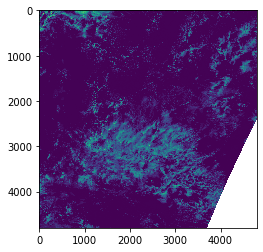

In [5]:
%%time 

plt.imshow(r1)

CPU times: user 8.75 s, sys: 342 ms, total: 9.09 s
Wall time: 9.4 s


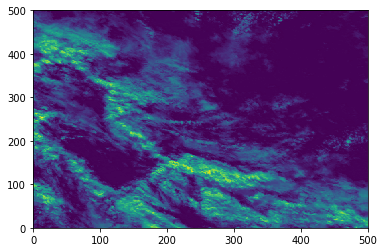

In [6]:
%%time
#Shau mal wie lange es dauert es mit pcolor zu plotten. Weil es lange dauert habe Ich es erstmal bis 500 begrenzt.  
plt.pcolor(r1[:500,:500])

In [ ]:
%%time
#Shau mal wie lange es dauert es mit pcolor zu plotten. Weil es lange dauert habe Ich es erstmal bis 500 begrenzt.  
#wall time 19min 25s
plt.pcolor(r1)

CPU times: user 3.17 s, sys: 3.29 s, total: 6.46 s
Wall time: 7.7 s


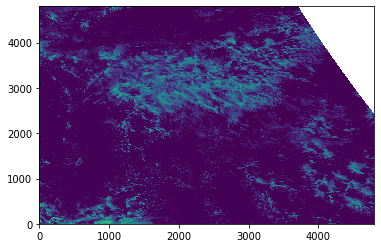

In [10]:
%%time
#test wie lange es mit pcolormesh dauert 
plt.pcolormesh(r1)

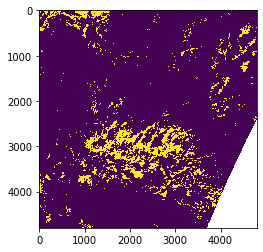

In [70]:
#Wir fangen an mit einem einfachen schwellwert ref_min. Alles drueber ist eine Wolke, alles drunter keins. 
ref_min = 4e7
cloud_2D_mask = np.zeros_like(r1)
cloud_2D_mask[r1>ref_min] = 1
plt.imshow(cloud_2D_mask);

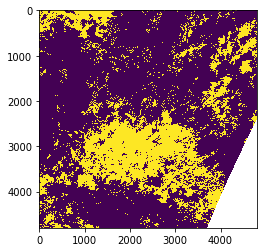

In [62]:
#Wir fangen an mit einem einfachen schwellwert ref_min. Alles drueber ist eine Wolke, alles drunter keins. 
ref_min = 1e7
cloud_2D_mask = np.zeros_like(r1)
cloud_2D_mask[r1>ref_min] = 1
plt.imshow(cloud_2D_mask);

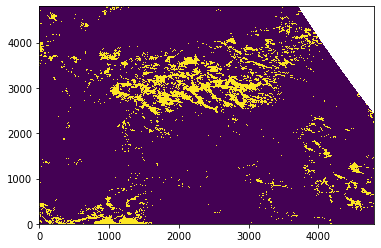

In [15]:
#Wir fangen an mit einem einfachen schwellwert ref_min. Alles drueber ist eine Wolke, alles drunter keins. 
ref_min = 4e7
cloud_2D_mask = np.zeros_like(r1)
cloud_2D_mask[r1>ref_min] = 1
#plt.imshow(cloud_2D_mask);
plt.pcolormesh(cloud_2D_mask);

In [71]:
labeled_clouds,n_clouds = ndi.label(cloud_2D_mask)
labels = np.arange(1, n_clouds+1)
n_clouds

13700

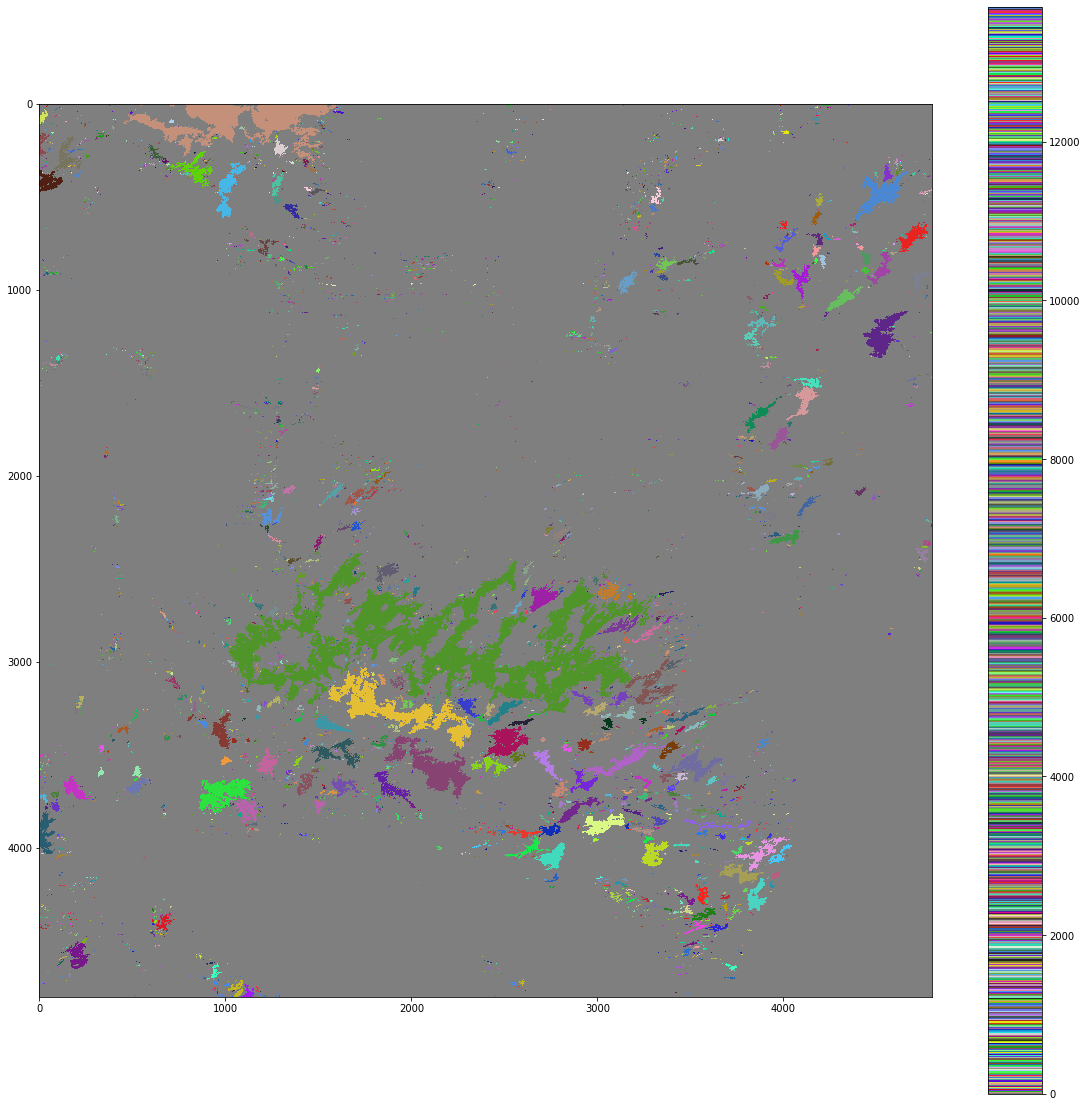

In [20]:
#Making new randomized color_map with grey at the beggining
colors = [(0.5,0.5,0.5)] + [(random(),random(),random()) for i in range(1000)]
random_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('random_cmap', colors, N=1000)

fig, ax = plt.subplots(1,1,figsize=(20,20))
im = ax.imshow(labeled_clouds,cmap=random_cmap)
plt.colorbar(im)

In [21]:
%%time

#Calculating how many cells belong to each labeled cloud using a loop over all clouds and np.where
cloud_number_cells = np.zeros(n_clouds)
cloud_mean_reflect = np.zeros(n_clouds)
#for c in range(n_clouds):
for c in range(100):
    idx_x,idx_y = np.where(labeled_clouds==c+1) 
    cloud_number_cells[c] = idx_x.size 
    cloud_mean_reflect[c] = np.mean(r1[idx_x,idx_y])
cloud_area = np.sqrt(cloud_number_cells)
print('max and min cloud area',np.min(cloud_area),np.max(cloud_area) )

max and min cloud area 0.0 346.49531021357274
CPU times: user 12 s, sys: 524 ms, total: 12.6 s
Wall time: 12.8 s


In [76]:
%%time 

#Calculating how many cells belong to each labeled cloud using ndi.labeled_comprehension
cloud_number_cells = ndi.labeled_comprehension(cloud_2D_mask,labeled_clouds,labels,np.size,float,0)
cloud_mean_reflect = ndi.labeled_comprehension(r1,labeled_clouds,labels,np.mean,float,0)
cloud_area = np.sqrt(cloud_number_cells)
print('max and min cloud area',np.min(cloud_area),np.max(cloud_area) )

max and min cloud area 1.0 740.2573876699914
[14.52583905 11.61895004  2.23606798 ...  3.          1.
  1.41421356]
CPU times: user 807 ms, sys: 532 ms, total: 1.34 s
Wall time: 1.55 s


In [23]:
%%time 
#And lets see how fast np.unique is
cloud_numbers, cloud_number_cells = np.unique(labeled_clouds,return_counts=True)
cloud_area = np.sqrt(cloud_number_cells)
print('max and min cloud area',np.min(cloud_area[1:]),np.max(cloud_area[1:]) )

max and min cloud area 1.0 740.2573876699914
CPU times: user 505 ms, sys: 88.4 ms, total: 593 ms
Wall time: 683 ms


In [ ]:
# Einfach ein paar plots der sortierten Eigenschaften. 

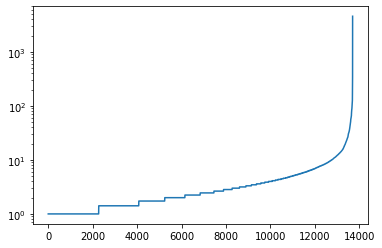

In [24]:
plt.plot(np.sort(cloud_area))
plt.yscale('log')

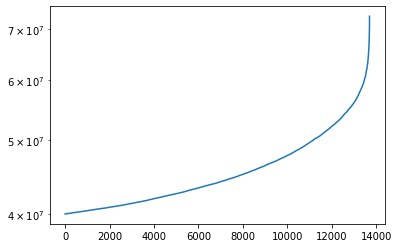

In [25]:
plt.plot(np.sort(cloud_mean_reflect))
plt.yscale('log')

In [39]:
ndi.label?


In [40]:
ndi.labeled_comprehension?


In [ ]:
# Versuch mal diese Daten in den log log plots rein zu schieben. 

In [46]:
r2 = file_modis.variables['sur_refl_b02_1'][:]

CPU times: user 444 ms, sys: 919 ms, total: 1.36 s
Wall time: 1.66 s


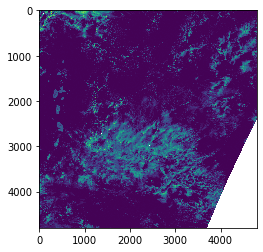

In [27]:
%%time

plt.imshow(r2)

CPU times: user 2.93 s, sys: 2.76 s, total: 5.69 s
Wall time: 6.5 s


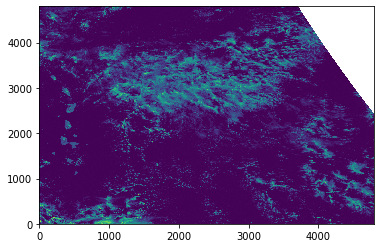

In [28]:
%%time

plt.pcolormesh(r2)

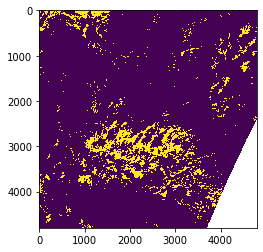

In [47]:
#marks everything above ref_min as a cloud
ref_min = 4e7
cloud_2D_mask2 = np.zeros_like(r2)
cloud_2D_mask2[r2>ref_min] = 1
plt.imshow(cloud_2D_mask2);


-2.514072629229905 -2.1435339132398608 -1.193582785105321


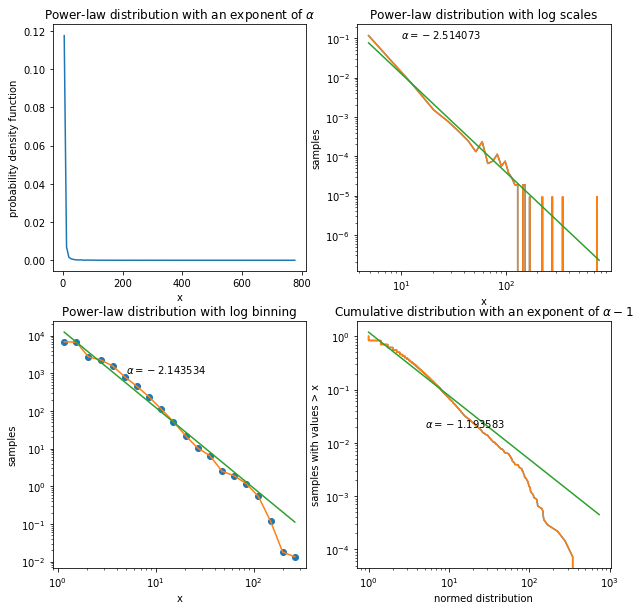

In [188]:
#from slopes_and_binning import func_newmann3
fig,m1,m2,m3 = func_newmann3(cloud_area,100,0.1,300,1,780)
print(m1,m2,m3)
#print(y,x_bins_lin)

In [48]:
#calculates how many clouds exist in cloud_2D_mask, returns total number of clouds
labeled_clouds2,n_clouds2 = ndi.label(cloud_2D_mask2)
labels2 = np.arange(1, n_clouds2+1)
n_clouds2

15304

In [49]:
%%time 

#Calculating how many cells belong to each labeled cloud using ndi.labeled_comprehension
#using sur_refl_b02_1 
cloud_number_cells2 = ndi.labeled_comprehension(cloud_2D_mask2,labeled_clouds2,labels2,np.size,float,0)
cloud_mean_reflect2 = ndi.labeled_comprehension(r2,labeled_clouds2,labels2,np.mean,float,0)
cloud_area2 = np.sqrt(cloud_number_cells2)
print('max and min cloud area',np.min(cloud_area2),np.max(cloud_area2) )

max and min cloud area 1.0 622.0048231324256
CPU times: user 737 ms, sys: 113 ms, total: 849 ms
Wall time: 859 ms


-2.643683508806589 -2.4381072232807073 -1.204758744087867


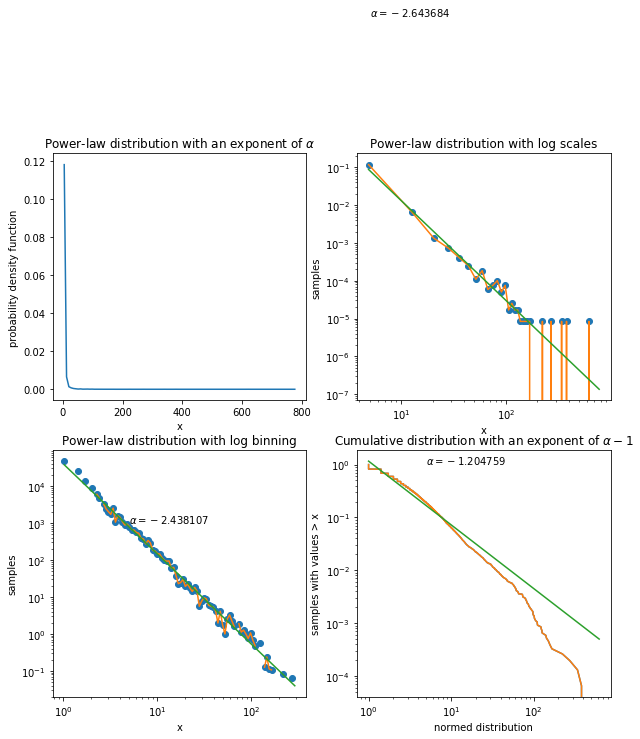

In [33]:
#creates newmanns figure 3 using sur_refl_b02_1 
fig,m1,m2,m3 = func_newmann3(cloud_area2,100,0.1,300,1,780)
print(m1,m2,m3)

number of clouds 15304
max and min cloud area 1.0 622.0048231324256
n: 3855
0.14902388688750265
b4 104.70910486001118
-2.4408763690571833 -2.463371812052228 -2.461724921349515


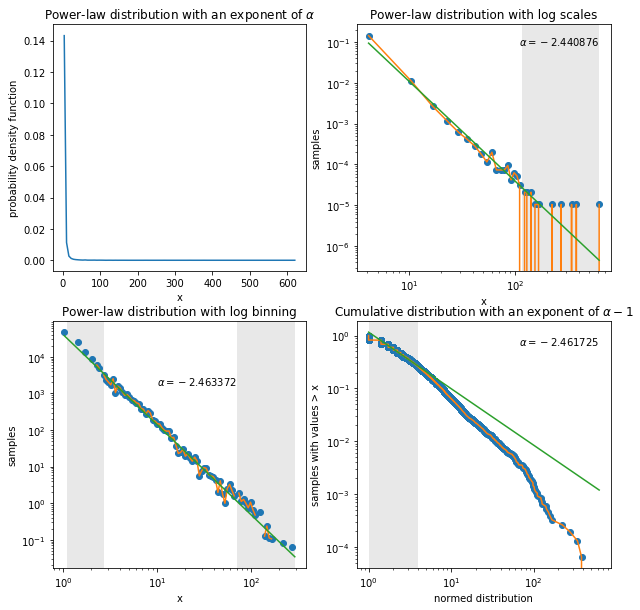

In [221]:
file_modis = Dataset('./MOD09GQ.A2013348.h12v07.006.2015271092141.nc')
file_modis.variables.keys()
fig,m1,m2,m3 = cloud_size_dist('sur_refl_b02_1',100,4e7,1,300,file_modis,x_min_pl=4)
print(m1,m2,m3)

In [55]:
def alpha_newman5(cloud_size,cloud_size_min=None):
    if cloud_size_min == None:
        xmin = np.min(cloud_size)
    else:
        xmin = cloud_size_min
    x = cloud_size[cloud_size>xmin]
    n = x.size
    print('n:',n)
    alpha = 1.+ n/(np.sum(np.log(x/xmin)))
    return alpha

number of clouds 32097
max and min cloud area 1.0 1738.8122382822132
number of clouds 24356
max and min cloud area 1.0 1276.371811033133
number of clouds 18554
max and min cloud area 1.0 1069.8298930203812
number of clouds 15304
max and min cloud area 1.0 622.0048231324256
number of clouds 11676
max and min cloud area 1.0 261.9809153354496
number of clouds 9322
max and min cloud area 1.0 152.58112596255148


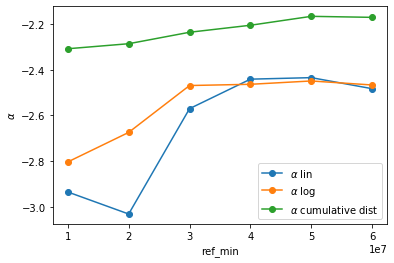

In [30]:
file_modis = Dataset('./MOD09GQ.A2013348.h12v07.006.2015271092141.nc')
file_modis.variables.keys()
ref_min = [1e7,2e7,3e7,4e7,5e7,6e7]
alpha_ref_min('sur_refl_b02_1',100,ref_min,0.1,300,file_modis)

number of clouds 32035
max and min cloud area 1.0 1823.3973785217527
number of clouds 24047
max and min cloud area 1.0 1283.6514324379496
number of clouds 17564
max and min cloud area 1.0 1078.200352439193
number of clouds 13700
max and min cloud area 1.0 740.2573876699914
number of clouds 10716
max and min cloud area 1.0 271.9062338380641
number of clouds 8576
max and min cloud area 1.0 156.5279527752152


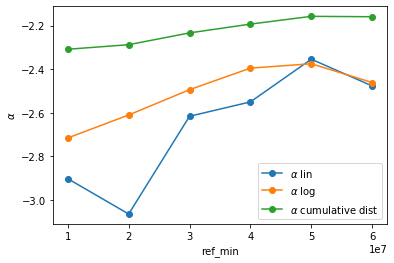

In [181]:
file_modis = Dataset('./MOD09GQ.A2013348.h12v07.006.2015271092141.nc')
file_modis.variables.keys()
ref_min = [1e7,2e7,3e7,4e7,5e7,6e7]
alpha_ref_min('sur_refl_b01_1',100,ref_min,0.1,300,file_modis)

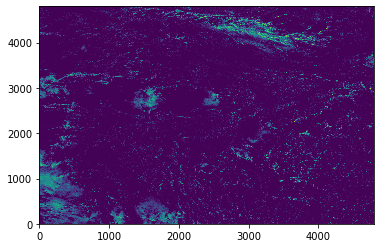

In [186]:
file_modis = Dataset('./MYD09GQ.A2019021.h12v07.006.2019023063455.nc')
file_modis.variables.keys()
t1 = file_modis.variables['sur_refl_b01_1'][:]
plt.pcolormesh(t1)

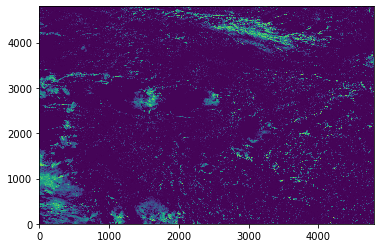

In [185]:
file_modis = Dataset('./MYD09GQ.A2019021.h12v07.006.2019023063455.nc')
t2 = file_modis.variables['sur_refl_b02_1'][:]
plt.pcolormesh(t2)

number of clouds 96478
max and min cloud area 1.0 752.9588302158359
n: 12895
number of clouds 90620
max and min cloud area 1.0 649.0485343947709
n: 10321
number of clouds 84234
max and min cloud area 1.0 625.0151998151725
n: 8534
number of clouds 48998
max and min cloud area 1.0 494.1892350102337
n: 4769
number of clouds 19891
max and min cloud area 1.0 341.2257317378043
n: 2502
number of clouds 13693
max and min cloud area 1.0 252.76866894455097
n: 1861


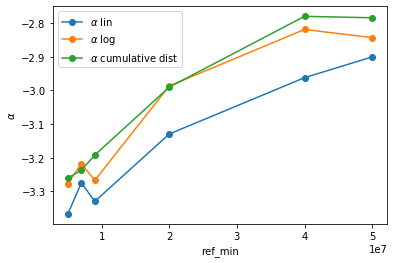

In [67]:
file_modis = Dataset('./MYD09GQ.A2019021.h12v07.006.2019023063455.nc')
file_modis.variables.keys()
ref_min = [5e6,7e6,9e6,2e7,4e7,5e7]
alpha_ref_min('sur_refl_b01_1',100,ref_min,0.1,300,file_modis,5)

number of clouds 53571
max and min cloud area 1.0 493.5068388583891
number of clouds 34585
max and min cloud area 1.0 357.38494652125456
number of clouds 23442
max and min cloud area 1.0 307.34996339677673
number of clouds 17421
max and min cloud area 1.0 251.3622883409522
number of clouds 15610
max and min cloud area 1.0 163.95121225535357
number of clouds 16704
max and min cloud area 1.0 47.93745925682754


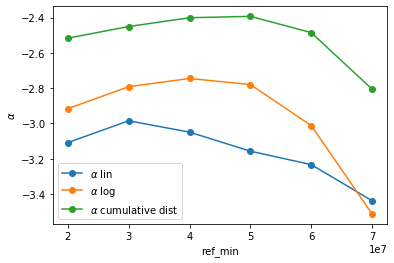

In [199]:
file_modis = Dataset('./MYD09GQ.A2019021.h12v07.006.2019023063455.nc')
file_modis.variables.keys()
ref_min = [2e7,3e7,4e7,5e7,6e7,7e7]
alpha_ref_min('sur_refl_b02_1',100,ref_min,0.1,300,file_modis)